# Sentiment Analysis on Elon Musk Tweets

<img src = 'https://github.com/taruntiwarihp/raw_images/blob/master/Musk.jpeg?raw=true'>

Text is everywhere in the form of openions, complaints, news and information; each of us are contributing in generating this text throughout the internet. This large amount of text which is present in the unstructured format can be used for welfare of the society and businesses by analysing the sentiments and trends. A part of NLP deals with Text processing and analysis. Commonly available text can not be directly used for analysis, it needs to pre-processed first, and that is where NLTK, the most popular library for text processing in Python, comes into the picture.


In this notebook, I am going to perform Sentiment Analysis on tweets on any desired topic. Instead of fetching tweets from and CSV I am going to scrap these tweets from the internet. So, get ready for a crash course on Scraping (using Selenium) and Twitter Sentiment Analysis.

### Actions I am going to perform are:


1. __<a href='#1' target='_self'>Import Libraries</a>__
1. __<a href='#2' target='_self'>Fetch Tweets & Sentiments</a>__
    1. __<a href='#2A' target='_self'>Fetch Tweets</a>__
        1. <a href='#2Aa' target='_self'>Using Selenium</a>
        1. <a href='#2Ab' target='_self'>Using tweepy</a>
    1. __<a href='#2B' target='_self'>Fetch sentiments</a>__
        1. <a href='#2Ba' target='_self'>Using NLTK's SentimentIntensityAnalyzer</a>
        1. <a href='#2Bb' target='_self'>Using TextBlob</a>
1. __<a href='#3' target='_self'>Text Pre-processing</a>__
    1. __<a href='#3A' target='_self'>Pre-processing 'Key Words'</a>__
        1. <a href='#3Aa' target='_self'>Removing '@names'</a>
        1. <a href='#3Ab' target='_self'>Removing links (http | https)</a>
        1. <a href='#3Ac' target='_self'>Removing tweets with empty text</a>
        1. <a href='#3Ad' target='_self'>Dropping duplicate rows</a>
        1. <a href='#3Ae' target='_self'>Removing Punctuations, Numbers and Special characters</a>
        1. <a href='#3Af' target='_self'>Removing Stop words</a>
        1. <a href='#3Ag' target='_self'>Tokenizing</a>
        1. <a href='#3Ah' target='_self'>Converting words to Lemma </a>
        1. <a href='#3i' target='_self'>Joining all tokens into sentences</a>
    1. __<a href='#3B' target='_self'>Pre-processing 'Key Phrases'</a>__
        1. <a href='#3Ba' target='_self'>Setting Grammatical rule to identify phrases</a>
        1. <a href='#3Bb' target='_self'>Creating new feature called 'key_phrases', will contain phrases for corresponding tweet</a>
1. __<a href='#4' target='_self'>Story Generation and Visualization</a>__
    1. __<a href='#4A' target='_self'>Most common words in positive tweets</a>__
    1. __<a href='#4B' target='_self'>Most common words in negative tweets</a>__
    1. __<a href='#4C' target='_self'>Most commonly used Hashtags</a>__
1. __<a href='#5' target='_self'>Feature Extraction</a>__
    1. __<a href='#5A' target='_self'>Feature Extraction for 'Key Words'</a>__
    1. __<a href='#5B' target='_self'>Feature Extraction for 'Key Phrases'</a>__
1. __<a href='#6' target='_self'>Model Building: Sentiment Analysis</a>__
    1. __<a href='#6A' target='_self'>Predictions on 'key words' based features</a>__
        1. <a href='#6Aa' target='_self'> BOW word features</a>
        1. <a href='#6Ab' target='_self'>TF-IDF word features</a>
    1. __<a href='#6B' target='_self'>Predictions on 'key phrases' based features</a>__
        1. <a href='#6Ba' target='_self'>BOW phrase features</a>
        1. <a href='#6Bb' target='_self'>TF-IDF phrase features</a>
       

## <a id='1'>1. Import Libraries</a>

In [59]:
!pip install selenium
!pip install tweepy

In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# To consume Twitter's API
import tweepy
from tweepy import OAuthHandler 

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# For Deploy
import pickle
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /usr/share/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading pac

In [61]:
# keys and tokens from the Twitter Dev Console
consumer_key = 'Sec3MvclRIx2RVlgu9l0SJX6D'
consumer_secret = 'ayoPNWtBm7fWpMBoK6EwRmegu3SW8Rw9mzJkottkv97quPe941'
access_token = '736550752760406018-so5CPJrEbJKb3c3Pq8va3VFr0yk4S0E'
access_token_secret = 'Cgr8tz0h6FTU7kxAjDzpHnjffNTHxWsBytXnu4Ihd1TFb'

In [62]:
class TwitterClient(object): 
    def __init__(self): 
        #Initialization method. 
        try: 
            # create OAuthHandler object 
            auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            # add hyper parameter 'proxy' if executing from behind proxy "proxy='http://172.22.218.218:8085'"
            self.api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            
        except tweepy.TweepError as e:
            print(f"Error: Tweeter Authentication Failed - \n{str(e)}")

    def get_tweets(self, query, maxTweets = 1000):
        #Function to fetch tweets. 
        # empty list to store parsed tweets 
        tweets = [] 
        sinceId = None
        max_id = -1
        tweetCount = 0
        tweetsPerQry = 100

        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry)
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break

                for tweet in new_tweets:
                    parsed_tweet = {} 
                    parsed_tweet['tweets'] = tweet.text 

                    # appending parsed tweet to tweets list 
                    if tweet.retweet_count > 0: 
                        # if tweet has retweets, ensure that it is appended only once 
                        if parsed_tweet not in tweets: 
                            tweets.append(parsed_tweet) 
                    else: 
                        tweets.append(parsed_tweet) 
                        
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id

            except tweepy.TweepError as e:
                # Just exit if any error
                print("Tweepy error : " + str(e))
                break
        
        return pd.DataFrame(tweets)

#### <a id='2Ab'>b. Using 'tweepy'</a>

In [63]:
twitter_client = TwitterClient()

# calling function to get tweets
tweets_df = twitter_client.get_tweets('Elon Musk', maxTweets=100000)
print(f'tweets_df Shape - {tweets_df.shape}')
tweets_df.head(10)

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1500 tweets
Downloaded 1600 tweets
Downloaded 1700 tweets
Downloaded 1800 tweets
Downloaded 1900 tweets
Downloaded 2000 tweets
Downloaded 2100 tweets
Downloaded 2200 tweets
Downloaded 2300 tweets
Downloaded 2400 tweets
Downloaded 2500 tweets
Downloaded 2600 tweets
Downloaded 2700 tweets
Downloaded 2800 tweets
Downloaded 2900 tweets
Downloaded 3000 tweets
Downloaded 3100 tweets
Downloaded 3200 tweets
Downloaded 3300 tweets
Downloaded 3400 tweets
Downloaded 3500 tweets
Downloaded 3600 tweets
Downloaded 3700 tweets
Downloaded 3800 tweets
Downloaded 3900 tweets
Downloaded 4000 tweets
Downloaded 4100 tweets
Downloaded 4200 tweets
Downloaded 4300 tweets
Downloaded 4400 twee

,tweets
0,RT @RBReich: Jeff Bezos and Elon Musk now own ...
1,RT @MVMerilainen: This panel is very much Elon...
2,RT @JYSexton: One of my favorite things about ...
3,@yourfavbrit1 We'll have it when Elon Musk wil...
4,Pola pengulangan sejarah : banjir nabi Nuh ?\n...
5,RT @dogecoin_rise: Elon Musk will easily push ...
6,RT @quesadiyya: i dont know of a bigger red fl...
7,RT @CNNBusiness: Tesla CEO Elon Musk says his ...
8,@MVMerilainen Actually that’s Bill Gates. Elon...
9,RT @paulg: The 100 richest Americans include 2...


### <a id='2B'>B. Fetch sentiments</a>
To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways: <br/>
    __a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)<br/>__
    __b. Using TextBlob<br/>__

In [64]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

#### <a id='2Ba'>a. Using NLTK's SentimentIntensityAnalyzer</a>

In [65]:
sentiments_using_SIA = tweets_df.tweets.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,tweets
pos,7098
neg,1866


#### <a id='2Bb'>b. Using TextBlob</a>

In [66]:
sentiments_using_textblob = tweets_df.tweets.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,tweets
pos,7634
neg,1330


*NLTK* gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.

In [67]:
tweets_df['sentiment'] = sentiments_using_SIA
tweets_df.head()

,tweets,sentiment
0,RT @RBReich: Jeff Bezos and Elon Musk now own ...,pos
1,RT @MVMerilainen: This panel is very much Elon...,pos
2,RT @JYSexton: One of my favorite things about ...,pos
3,@yourfavbrit1 We'll have it when Elon Musk wil...,pos
4,Pola pengulangan sejarah : banjir nabi Nuh ?\n...,pos


## <a id='3'>3. Text Pre-processing</a> 
### <a id='3A'>A. Pre-processing 'Key Words'</a>
#### <a id='3Aa'>a. Removing '@names'</a>
Here we can see that at many places we have '@names', which is of no use, since it don't have any meaning, So needs to be removed.

In [68]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [69]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
tweets_df['tidy_tweets'] = np.vectorize(remove_pattern)(tweets_df['tweets'], "@[\w]*: | *RT*")
tweets_df.head(10)

,tweets,sentiment,tidy_tweets
0,RT @RBReich: Jeff Bezos and Elon Musk now own ...,pos,Jeff Bezos and Elon Musk now own more wealth ...
1,RT @MVMerilainen: This panel is very much Elon...,pos,This panel is very much Elon Musk in a nutshe...
2,RT @JYSexton: One of my favorite things about ...,pos,One of my favorite things about criticizing E...
3,@yourfavbrit1 We'll have it when Elon Musk wil...,pos,@yourfavbrit1 We'll have it when Elon Musk wil...
4,Pola pengulangan sejarah : banjir nabi Nuh ?\n...,pos,Pola pengulangan sejarah : banjir nabi Nuh ?\n...
5,RT @dogecoin_rise: Elon Musk will easily push ...,pos,Elon Musk will easily push #Dogecoin to 1 Dol...
6,RT @quesadiyya: i dont know of a bigger red fl...,pos,i dont know of a bigger red flag than a guy w...
7,RT @CNNBusiness: Tesla CEO Elon Musk says his ...,pos,Tesla CEO Elon Musk says his company's cars w...
8,@MVMerilainen Actually that’s Bill Gates. Elon...,pos,@MVMerilainen Actually that’s Bill Gates. Elon...
9,RT @paulg: The 100 richest Americans include 2...,pos,The 100 richest Americans include 26 people u...


Seems good, now we don't have '@name' values
#### <a id='3Ab'>b. Removing links (http | https)</a>

In [70]:
cleaned_tweets = []

for index, row in tweets_df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

tweets_df['tidy_tweets'] = cleaned_tweets
tweets_df.head(10)

,tweets,sentiment,tidy_tweets
0,RT @RBReich: Jeff Bezos and Elon Musk now own ...,pos,Jeff Bezos and Elon Musk now own more wealth t...
1,RT @MVMerilainen: This panel is very much Elon...,pos,This panel is very much Elon Musk in a nutshell.
2,RT @JYSexton: One of my favorite things about ...,pos,One of my favorite things about criticizing El...
3,@yourfavbrit1 We'll have it when Elon Musk wil...,pos,@yourfavbrit1 We'll have it when Elon Musk wil...
4,Pola pengulangan sejarah : banjir nabi Nuh ?\n...,pos,Pola pengulangan sejarah : banjir nabi Nuh ? -...
5,RT @dogecoin_rise: Elon Musk will easily push ...,pos,Elon Musk will easily push #Dogecoin to 1 Dollar.
6,RT @quesadiyya: i dont know of a bigger red fl...,pos,i dont know of a bigger red flag than a guy wh...
7,RT @CNNBusiness: Tesla CEO Elon Musk says his ...,pos,Tesla CEO Elon Musk says his company's cars wo...
8,@MVMerilainen Actually that’s Bill Gates. Elon...,pos,@MVMerilainen Actually that’s Bill Gates. Elon...
9,RT @paulg: The 100 richest Americans include 2...,pos,The 100 richest Americans include 26 people un...


#### <a id='3Ac'>c. Removing tweets with empty text</a>

In [71]:
tweets_df = tweets_df[tweets_df['tidy_tweets']!='']
tweets_df.head()

,tweets,sentiment,tidy_tweets
0,RT @RBReich: Jeff Bezos and Elon Musk now own ...,pos,Jeff Bezos and Elon Musk now own more wealth t...
1,RT @MVMerilainen: This panel is very much Elon...,pos,This panel is very much Elon Musk in a nutshell.
2,RT @JYSexton: One of my favorite things about ...,pos,One of my favorite things about criticizing El...
3,@yourfavbrit1 We'll have it when Elon Musk wil...,pos,@yourfavbrit1 We'll have it when Elon Musk wil...
4,Pola pengulangan sejarah : banjir nabi Nuh ?\n...,pos,Pola pengulangan sejarah : banjir nabi Nuh ? -...


#### <a id='3Ad'>d. Dropping duplicate rows</a>

In [72]:
tweets_df.drop_duplicates(subset=['tidy_tweets'], keep=False)
tweets_df.head()

,tweets,sentiment,tidy_tweets
0,RT @RBReich: Jeff Bezos and Elon Musk now own ...,pos,Jeff Bezos and Elon Musk now own more wealth t...
1,RT @MVMerilainen: This panel is very much Elon...,pos,This panel is very much Elon Musk in a nutshell.
2,RT @JYSexton: One of my favorite things about ...,pos,One of my favorite things about criticizing El...
3,@yourfavbrit1 We'll have it when Elon Musk wil...,pos,@yourfavbrit1 We'll have it when Elon Musk wil...
4,Pola pengulangan sejarah : banjir nabi Nuh ?\n...,pos,Pola pengulangan sejarah : banjir nabi Nuh ? -...


#### <a id='3Ae'>e. Resetting index</a>
It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.

In [73]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.head()

,tweets,sentiment,tidy_tweets
0,RT @RBReich: Jeff Bezos and Elon Musk now own ...,pos,Jeff Bezos and Elon Musk now own more wealth t...
1,RT @MVMerilainen: This panel is very much Elon...,pos,This panel is very much Elon Musk in a nutshell.
2,RT @JYSexton: One of my favorite things about ...,pos,One of my favorite things about criticizing El...
3,@yourfavbrit1 We'll have it when Elon Musk wil...,pos,@yourfavbrit1 We'll have it when Elon Musk wil...
4,Pola pengulangan sejarah : banjir nabi Nuh ?\n...,pos,Pola pengulangan sejarah : banjir nabi Nuh ? -...


#### <a id='3Af'>f. Removing Punctuations, Numbers and Special characters</a>
This step should not be followed if we also want to do sentiment analysis on __key phrases__ as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on __key words__.

In [74]:
tweets_df['absolute_tidy_tweets'] = tweets_df['tidy_tweets'].str.replace("[^a-zA-Z# ]", "")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


#### <a id='3Ag'>g. Removing Stop words</a>
With the same reason we mentioned above, we won't perform this on 'tidy_tweets' column, because it needs to be used for __key_phrases__ sentiment analysis.

In [75]:
stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in tweets_df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
tweets_df['absolute_tidy_tweets'] = cleaned_tweets
tweets_df.head(10)

,tweets,sentiment,tidy_tweets,absolute_tidy_tweets
0,RT @RBReich: Jeff Bezos and Elon Musk now own ...,pos,Jeff Bezos and Elon Musk now own more wealth t...,Jeff Bezos Elon Musk wealth bottom Americans c...
1,RT @MVMerilainen: This panel is very much Elon...,pos,This panel is very much Elon Musk in a nutshell.,This panel much Elon Musk nutshell
2,RT @JYSexton: One of my favorite things about ...,pos,One of my favorite things about criticizing El...,One favorite things criticizing Elon Musk wave...
3,@yourfavbrit1 We'll have it when Elon Musk wil...,pos,@yourfavbrit1 We'll have it when Elon Musk wil...,yourfavbrit Well Elon Musk reach mars
4,Pola pengulangan sejarah : banjir nabi Nuh ?\n...,pos,Pola pengulangan sejarah : banjir nabi Nuh ? -...,Pola pengulangan sejarah banjir nabi Nuh Elon ...
5,RT @dogecoin_rise: Elon Musk will easily push ...,pos,Elon Musk will easily push #Dogecoin to 1 Dollar.,Elon Musk easily push Dollar
6,RT @quesadiyya: i dont know of a bigger red fl...,pos,i dont know of a bigger red flag than a guy wh...,dont know bigger red flag guy idolizes elon musk
7,RT @CNNBusiness: Tesla CEO Elon Musk says his ...,pos,Tesla CEO Elon Musk says his company's cars wo...,Tesla CEO Elon Musk says companys cars would n...
8,@MVMerilainen Actually that’s Bill Gates. Elon...,pos,@MVMerilainen Actually that’s Bill Gates. Elon...,MVMerilainen Actually thats Bill Gates Elon Mu...
9,RT @paulg: The 100 richest Americans include 2...,pos,The 100 richest Americans include 26 people un...,The richest Americans include people founders ...


#### <a id='3Ah'>h. Tokenize *'absolute_tidy_tweets'*</a>  

In [76]:
tokenized_tweet = tweets_df['absolute_tidy_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Jeff, Bezos, Elon, Musk, wealth, bottom, Amer...
1            [This, panel, much, Elon, Musk, nutshell]
2    [One, favorite, things, criticizing, Elon, Mus...
3         [yourfavbrit, Well, Elon, Musk, reach, mars]
4    [Pola, pengulangan, sejarah, banjir, nabi, Nuh...
Name: absolute_tidy_tweets, dtype: object

#### <a id='3Ai'>i. Converting words to Lemma</a>

In [77]:
word_lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0    [Jeff, Bezos, Elon, Musk, wealth, bottom, Amer...
1            [This, panel, much, Elon, Musk, nutshell]
2    [One, favorite, thing, criticizing, Elon, Musk...
3          [yourfavbrit, Well, Elon, Musk, reach, mar]
4    [Pola, pengulangan, sejarah, banjir, nabi, Nuh...
Name: absolute_tidy_tweets, dtype: object

#### <a id='3Aj'>j. Joining all tokens into sentences</a>

In [78]:
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

tweets_df['absolute_tidy_tweets'] = tokenized_tweet
tweets_df.head(10)

,tweets,sentiment,tidy_tweets,absolute_tidy_tweets
0,RT @RBReich: Jeff Bezos and Elon Musk now own ...,pos,Jeff Bezos and Elon Musk now own more wealth t...,Jeff Bezos Elon Musk wealth bottom Americans c...
1,RT @MVMerilainen: This panel is very much Elon...,pos,This panel is very much Elon Musk in a nutshell.,This panel much Elon Musk nutshell
2,RT @JYSexton: One of my favorite things about ...,pos,One of my favorite things about criticizing El...,One favorite thing criticizing Elon Musk wave ...
3,@yourfavbrit1 We'll have it when Elon Musk wil...,pos,@yourfavbrit1 We'll have it when Elon Musk wil...,yourfavbrit Well Elon Musk reach mar
4,Pola pengulangan sejarah : banjir nabi Nuh ?\n...,pos,Pola pengulangan sejarah : banjir nabi Nuh ? -...,Pola pengulangan sejarah banjir nabi Nuh Elon ...
5,RT @dogecoin_rise: Elon Musk will easily push ...,pos,Elon Musk will easily push #Dogecoin to 1 Dollar.,Elon Musk easily push Dollar
6,RT @quesadiyya: i dont know of a bigger red fl...,pos,i dont know of a bigger red flag than a guy wh...,dont know bigger red flag guy idolizes elon musk
7,RT @CNNBusiness: Tesla CEO Elon Musk says his ...,pos,Tesla CEO Elon Musk says his company's cars wo...,Tesla CEO Elon Musk say company car would neve...
8,@MVMerilainen Actually that’s Bill Gates. Elon...,pos,@MVMerilainen Actually that’s Bill Gates. Elon...,MVMerilainen Actually thats Bill Gates Elon Mu...
9,RT @paulg: The 100 richest Americans include 2...,pos,The 100 richest Americans include 26 people un...,The richest Americans include people founder s...


### <a id='3B'>B. Pre-processing 'Key Phrases'</a> 

#### <a id='3Ba'>a. Helper class, will help in preprocessing phrase terms</a>

In [79]:
class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        """Finds NP (nounphrase) leaf nodes of a chunk tree."""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        """Normalises words to lowercase and stems and lemmatizes it."""
        word = word.lower()
        # word = self.stemmer.stem_word(word) # We will loose the exact meaning of the word 
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        """Checks conditions for acceptable word: length, stopword. We can increase the length if we want to consider large phrase"""
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term

#### <a id='3Bb'>b. Grammatical rule to identify phrases</a>

In [80]:
sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

#### <a id='3Bc'>c. New feature called 'key_phrases', will contain phrases for corresponding tweet</a>

In [81]:
key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in tweets_df.iterrows(): 
    toks = nltk.regexp_tokenize(row.tidy_tweets, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    tweet_phrases = []

    for term in terms:
        if len(term):
            tweet_phrases.append(' '.join(term))
    
    key_phrases.append(tweet_phrases)
    
key_phrases[:10]

[['jeff bezos', 'elon musk', 'wealth', 'american', 'louis brandeis', ', “w'],
 ['panel', 'much elon musk', 'nutshell'],
 ['favorite thing', 'elon musk', 'wave', 'people', 'successful theig'],
 ["yourfavbrit1  we'", 'elon musk', 'mar'],
 ['pola pengulangan sejarah', 'banjir nabi nuh', ' - e lon musk mar'],
 ['elon musk', 'dogecoin'],
 ['know', 'red flag', 'guy', 'elon musk'],
 ['tesla  ceo elon musk',
  'company',
  'car',
  'china',
  'response',
  'report',
  'count'],
 ['@mvm erilainen actually', '’s b', 'gate', 'elon musk', 'cyber pappa'],
 ['american',
  'people',
  'founder',
  'spouse',
  'founder',
  'descendant',
  'founder',
  'inves']]

In obtained key phrases, we can see words like 'year', 'talk', 'appl', 'compan' etc. are present which should never be considered as key phrases. There is one other simple way to extract key phrases, by using TextBlob (ConllExtractor).

In [82]:
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in tweets_df.iterrows():
    # filerting out all the hashtags
    words_without_hash = [word for word in row.tidy_tweets.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

textblob_key_phrases[:10]

[['jeff bezos', 'elon musk', 'louis brandeis'],
 ['much elon musk'],
 ['elon musk', 'successful theig…'],
 ['elon musk'],
 ['pola pengulangan sejarah', 'banjir nabi nuh', 'elon musk ke'],
 ['elon musk'],
 ['bigger red flag', 'who idolizes elon musk'],
 ['tesla ceo elon musk', 'china'],
 ['bill gates', 'elon musk', 'cyber pappas'],
 []]

These key phrases seems better, let's consider these key phrase only.

In [83]:
tweets_df['key_phrases'] = textblob_key_phrases
tweets_df.head(10)

,tweets,sentiment,tidy_tweets,absolute_tidy_tweets,key_phrases
0,RT @RBReich: Jeff Bezos and Elon Musk now own ...,pos,Jeff Bezos and Elon Musk now own more wealth t...,Jeff Bezos Elon Musk wealth bottom Americans c...,"[jeff bezos, elon musk, louis brandeis]"
1,RT @MVMerilainen: This panel is very much Elon...,pos,This panel is very much Elon Musk in a nutshell.,This panel much Elon Musk nutshell,[much elon musk]
2,RT @JYSexton: One of my favorite things about ...,pos,One of my favorite things about criticizing El...,One favorite thing criticizing Elon Musk wave ...,"[elon musk, successful theig…]"
3,@yourfavbrit1 We'll have it when Elon Musk wil...,pos,@yourfavbrit1 We'll have it when Elon Musk wil...,yourfavbrit Well Elon Musk reach mar,[elon musk]
4,Pola pengulangan sejarah : banjir nabi Nuh ?\n...,pos,Pola pengulangan sejarah : banjir nabi Nuh ? -...,Pola pengulangan sejarah banjir nabi Nuh Elon ...,"[pola pengulangan sejarah, banjir nabi nuh, el..."
5,RT @dogecoin_rise: Elon Musk will easily push ...,pos,Elon Musk will easily push #Dogecoin to 1 Dollar.,Elon Musk easily push Dollar,[elon musk]
6,RT @quesadiyya: i dont know of a bigger red fl...,pos,i dont know of a bigger red flag than a guy wh...,dont know bigger red flag guy idolizes elon musk,"[bigger red flag, who idolizes elon musk]"
7,RT @CNNBusiness: Tesla CEO Elon Musk says his ...,pos,Tesla CEO Elon Musk says his company's cars wo...,Tesla CEO Elon Musk say company car would neve...,"[tesla ceo elon musk, china]"
8,@MVMerilainen Actually that’s Bill Gates. Elon...,pos,@MVMerilainen Actually that’s Bill Gates. Elon...,MVMerilainen Actually thats Bill Gates Elon Mu...,"[bill gates, elon musk, cyber pappas]"
9,RT @paulg: The 100 richest Americans include 2...,pos,The 100 richest Americans include 26 people un...,The richest Americans include people founder s...,[]


## <a id='4'>4. Story Generation and Visualization</a>

#### <a id='4A'>A. Most common words in positive tweets</a>
Answer can be best found using WordCloud

In [84]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

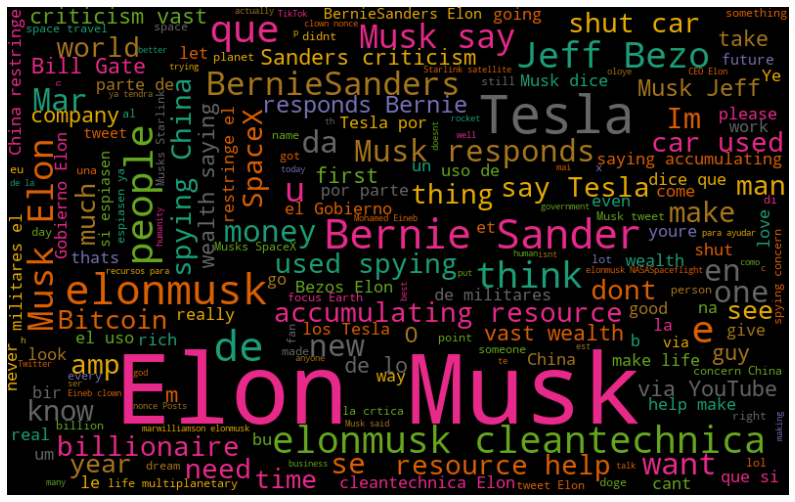

In [85]:
all_words = ' '.join([text for text in tweets_df['absolute_tidy_tweets'][tweets_df.sentiment == 'pos']])
generate_wordcloud(all_words)

#### <a id='4B'>B. Most common words in negative tweets</a>

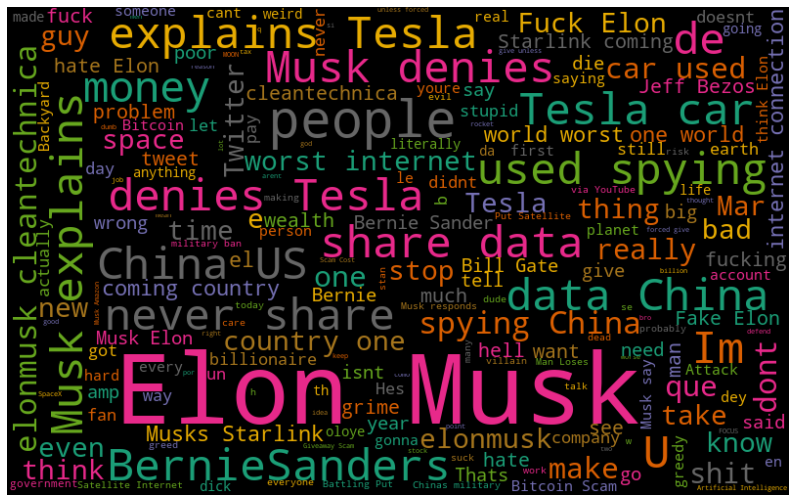

In [86]:
all_words = ' '.join([text for text in tweets_df['absolute_tidy_tweets'][tweets_df.sentiment == 'neg']])
generate_wordcloud(all_words)

- One thing to notice here is that word _'deep learning'_ has been used more than _'Machine Learning', 'AI', 'Artificial Intelligence', 'BigData'_ and _'DataScience'_, which shows the buzz of deep learning these days.

- AI, DeepLearning and MachineLearning have clearly been used in both positive and negative tweets, which is very obvious.
However, in negative tweets we can also see negative words as well like *stop, wrong, Unfortunately, fall, Cancer, shit, Greed, pressure, problem, complex, biased, never etc.*

#### <a id='4C'>C. Most commonly used Hashtags</a>

In [87]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [88]:
hashtags = hashtag_extract(tweets_df['tidy_tweets'])
hashtags = sum(hashtags, [])

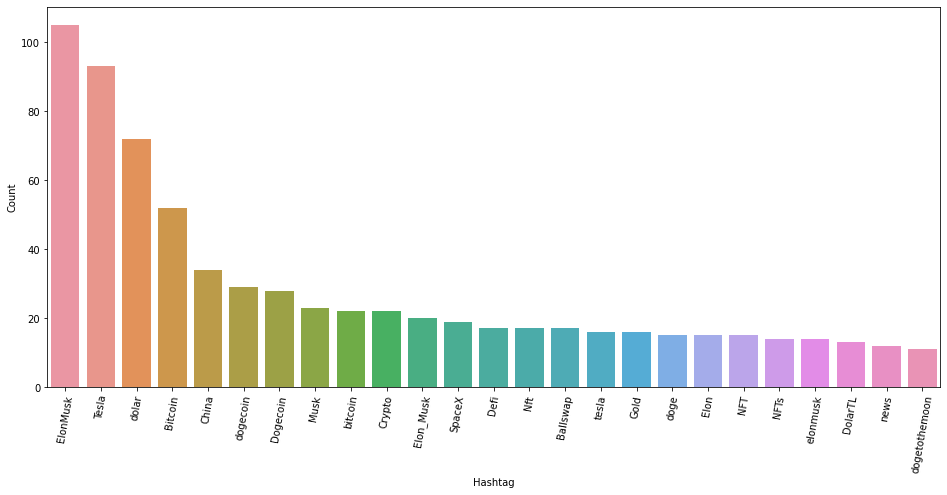

In [89]:
generate_hashtag_freqdist(hashtags)

As expected, AI, DeepLearning and MachineLearning are most common hashtags.

In [90]:
# For sake of consistency, we are going to discard the records which contains no phrases i.e where tweets_df['key_phrases'] contains []
tweets_df2 = tweets_df[tweets_df['key_phrases'].str.len()>0]

## <a id='5'>5. Feature Extraction</a>

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1. __Bag of words (Simple vectorization)__
2. __TF-IDF (Term Frequency - Inverse Document Frequency)__

We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.


### <a id='5A'>A. Feature Extraction for 'Key Words'</a>

In [91]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(tweets_df2['absolute_tidy_tweets'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(tweets_df2['absolute_tidy_tweets'])

### <a id='5B'>B. Feature Extraction for 'Key Phrases'</a>

In [92]:
phrase_sents = tweets_df2['key_phrases'].apply(lambda x: ' '.join(x))

# BOW phrase features
bow_phrase_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow_phrase_feature = bow_phrase_vectorizer.fit_transform(phrase_sents)

# TF-IDF phrase feature
tfidf_phrase_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2)
tfidf_phrase_feature = tfidf_phrase_vectorizer.fit_transform(phrase_sents)

## <a id='6'>6. Model Building: Sentiment Analysis</a>

#### Map target variables to  {0, 1}

In [93]:
target_variable = tweets_df2['sentiment'].apply(lambda x: 0 if x=='neg' else 1)

In [94]:
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

In [95]:
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

### <a id='6A'>A. Predictions on 'key words' based features</a>

#### <a id='6Aa'>a. BOW word features</a>

Accuracy Score - 0.6683475562451513


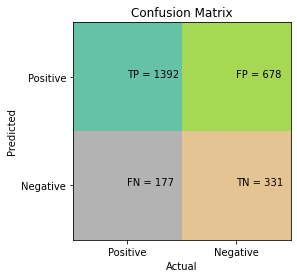

In [96]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

#### <a id='6Ab'>b. TF-IDF word features</a>

Accuracy Score - 0.6667959658650117


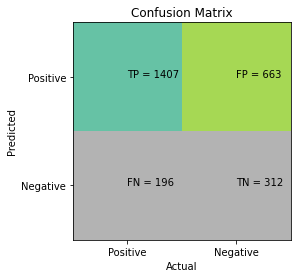

In [97]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

### <a id='6B'>B. Predictions on 'key phrases' based features</a>

#### <a id='6Ba'>a. BOW Phrase features</a>

Accuracy Score - 0.5888285492629945


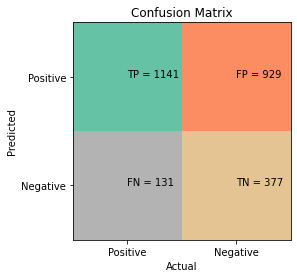

In [98]:
X_train, X_test, y_train, y_test = train_test_split(bow_phrase_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

#### <a id='6Bb'>b. TF-IDF Phrase features</a>

Accuracy Score - 0.5899922420480993


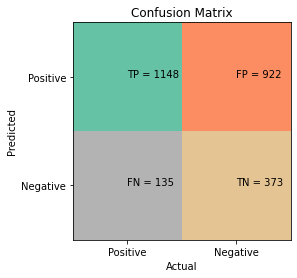

In [99]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_phrase_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

Features extracted from 'key words' helps model in performing better. They have better positive predictions than the later one. However, using 'key-phrase' based features improves the negative predictions.<br/><br/>

__Now i Will make Sklearn Pipline using Logistic Regression__

In [100]:
tweets_df2['sentiment'] = tweets_df2['sentiment'].apply(lambda x: 0 if x=='neg' else 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
pipeline_ls = make_pipeline(CountVectorizer(max_df=0.90, min_df=2, tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [102]:
X_train, X_test, y_train, y_test = train_test_split(tweets_df2.tweets, tweets_df2.sentiment)

In [103]:
pipeline_ls.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.9, min_df=2, stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>)),
                ('logisticregression', LogisticRegression())])

In [104]:
pipeline_ls.score(X_test,y_test) 

0.8770949720670391

In [105]:
pickle.dump(pipeline_ls,open('sentiment_analysis.pkl','wb'))

In [106]:
loaded_model = pickle.load(open('sentiment_analysis.pkl', 'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

0.8770949720670391


In [107]:
p = ['RT @chubiei: After his divorce, Kanye West is the richest black American with an estimated net worth of $6.6billion. Elon Musk &amp; Jeff Bezos…']
result = loaded_model.predict(p)

In [108]:
print(result)

[1]


In [109]:
tweets_df['tweets'][2]

'RT @JYSexton: One of my favorite things about criticizing Elon Musk is the wave of people who remind me how unfathomably successful the Rig…'